In [52]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from dmba import classificationSummary, liftChart

In [53]:
auc = pd.read_csv('eBayAuctions.csv')

In [54]:
auc.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [55]:
print(auc.Category.unique())

['Music/Movie/Game' 'Automotive' 'SportingGoods' 'Home/Garden' 'Books'
 'Collectibles' 'Business/Industrial' 'Toys/Hobbies' 'Electronics'
 'Computer' 'EverythingElse' 'Clothing/Accessories' 'Coins/Stamps'
 'Antique/Art/Craft' 'Jewelry' 'Pottery/Glass' 'Health/Beauty'
 'Photography']


In [56]:
print(auc.currency.unique())

['US' 'GBP' 'EUR']


In [57]:
print(auc.endDay.unique())

['Mon' 'Tue' 'Fri' 'Thu' 'Sat' 'Sun' 'Wed']


In [58]:
auc.drop(columns = ['Category'], axis=1, inplace = True)

#convert categorical variables to dummies
auc = pd.get_dummies(auc, drop_first = True)

#split into training and validation
X = auc.drop(columns = ['Competitive?'])
y = auc['Competitive?']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.40, random_state = 3)

In [59]:
X.head()

,sellerRating,Duration,ClosePrice,OpenPrice,currency_GBP,currency_US,endDay_Mon,endDay_Sat,endDay_Sun,endDay_Thu,endDay_Tue,endDay_Wed
0,3249,5,0.01,0.01,0,1,1,0,0,0,0,0
1,3249,5,0.01,0.01,0,1,1,0,0,0,0,0
2,3249,5,0.01,0.01,0,1,1,0,0,0,0,0
3,3249,5,0.01,0.01,0,1,1,0,0,0,0,0
4,3249,5,0.01,0.01,0,1,1,0,0,0,0,0


In [60]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Competitive?, dtype: int64

In [61]:
defaultTree = DecisionTreeClassifier(random_state=1)
defaultTree.fit(X_train, y_train)

classes = defaultTree.classes_
classificationSummary(y_valid, defaultTree.predict(X_valid), class_names=defaultTree.classes_)

Confusion Matrix (Accuracy 0.8631)

       Prediction
Actual   0   1
     0 309  46
     1  62 372


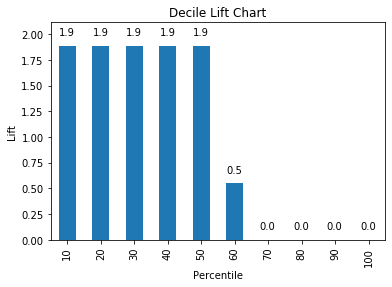

In [62]:
pred_v = pd.Series(defaultTree.predict(X_valid)) 
pred_v = pred_v.sort_values(ascending=False)

liftChart(pred_v)

Looking at the validation set, the overall accuracy is 86.31% and the lift on the first decile is 1.9

In [63]:
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)

classificationSummary(y_valid, boost.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.8504)

       Prediction
Actual   0   1
     0 312  43
     1  75 359


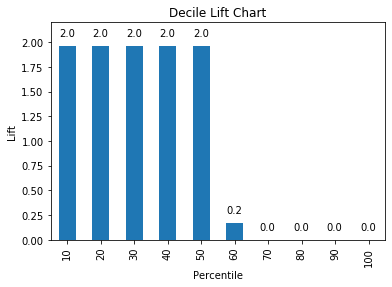

In [65]:
pred_v = pd.Series(boost.predict(X_valid)) 
pred_v = pred_v.sort_values(ascending=False)

liftChart(pred_v)

Looking at the validation set, the overall accuracy is 85.04% and the lift on the first decile is 2.0

In [66]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), 
                            n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)

classificationSummary(y_valid, bagging.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.8910)

       Prediction
Actual   0   1
     0 328  27
     1  59 375


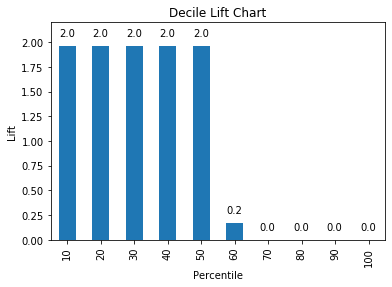

In [68]:
pred_v = pd.Series(bagging.predict(X_valid)) 
pred_v = pred_v.sort_values(ascending=False)

liftChart(pred_v)

Looking at the validation set, the overall accuracy is 89.10% and the lift on the first decile is 2.0

In [70]:
rfModel = RandomForestClassifier(n_estimators=100, random_state=1)
rfModel.fit(X_train, y_train)

classificationSummary(y_valid, rfModel.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.8568)

       Prediction
Actual   0   1
     0 313  42
     1  71 363


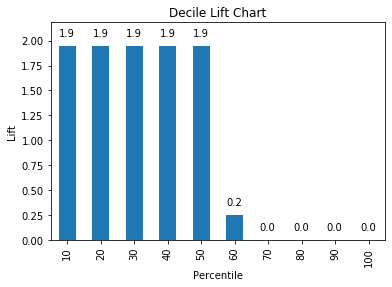

In [71]:
pred_v = pd.Series(rfModel.predict(X_valid)) 
pred_v = pred_v.sort_values(ascending=False)

liftChart(pred_v)

The bagged tree has a higher accuracy and lift when compared to the random forest.